In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import cufflinks as cf
cf.set_config_file(offline=True)

In [2]:
df1 = pdr.get_data_yahoo('GS', '2011-01-01', '2021-10-31')
df1 = df1[['Open', 'Close']]
df1 = df1.rename(columns = {'Open': 'Open_GS', 'Close': 'Close_GS'}) 
df2 = pdr.get_data_yahoo('AMZN', '2011-01-01', '2021-10-31') 
df2 = df2[['Open', 'Close']]
df2 = df2.rename(columns = {'Open': 'Open_AMZN', 'Close': 'Close_AMZN'})
df3 = pdr.get_data_yahoo('NFLX', '2011-01-01', '2021-10-31') 
df3 = df3[['Open', 'Close']]
df3 = df3.rename(columns = {'Open': 'Open_NFLX', 'Close': 'Close_NFLX'})
df4 = pdr.get_data_yahoo('AAPL', '2011-01-01', '2021-10-31') 
df4 = df4[['Open', 'Close']]
df4 = df4.rename(columns = {'Open': 'Open_AAPL', 'Close': 'Close_AAPL'})
df5 = pdr.get_data_yahoo('WFC', '2011-01-01', '2021-10-31') 
df5 = df5[['Open', 'Close']]
df5 = df5.rename(columns = {'Open': 'Open_WFC', 'Close': 'Close_WFC'})
df = df1.merge(df2, on = 'Date')
df = df.merge(df3, on = 'Date')
df = df.merge(df4, on = 'Date')
df = df.merge(df5, on = 'Date')
df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open_GS,Close_GS,Open_AMZN,Close_AMZN,Open_NFLX,Close_NFLX,Open_AAPL,Close_AAPL,Open_WFC,Close_WFC
Date,,,,,,,,,,
2010-12-31,167.580002,168.160004,181.960007,180.000000,25.578571,25.100000,11.533929,11.520000,30.719999,30.990000
2011-01-03,170.550003,173.050003,181.369995,184.220001,25.000000,25.487143,11.630000,11.770357,31.299999,31.580000
2011-01-04,173.869995,173.080002,186.149994,185.009995,25.907143,25.910000,11.872857,11.831786,31.650000,31.650000
2011-01-05,172.050003,174.000000,184.100006,187.419998,25.878571,25.675714,11.769643,11.928571,31.410000,32.369999
2011-01-06,174.509995,172.210007,186.500000,185.860001,25.168571,25.427143,11.954286,11.918929,32.150002,32.150002
...,...,...,...,...,...,...,...,...,...,...
2021-10-25,416.209991,414.750000,3335.000000,3320.370117,663.739990,671.659973,148.679993,148.639999,50.889999,50.619999
2021-10-26,416.369995,417.609985,3349.510010,3376.070068,673.760010,668.520020,149.330002,149.320007,50.730000,50.630001
2021-10-27,416.549988,410.989990,3388.000000,3392.489990,669.000000,662.919983,149.360001,148.850006,50.259998,50.049999


In [3]:
three_years = df.loc['2011-01-01': '2014-12-31']
three_years = three_years[['Close_GS','Close_AMZN','Close_NFLX','Close_AAPL','Close_WFC']]
three_years['Return_GS']= three_years['Close_GS'].pct_change()
three_years['Return_AMZN']= three_years['Close_AMZN'].pct_change()
three_years['Return_NFLX']= three_years['Close_NFLX'].pct_change()
three_years['Return_AAPL']= three_years['Close_AAPL'].pct_change()
three_years['Return_WFC']= three_years['Close_WFC'].pct_change()
three_years = three_years[['Return_GS','Return_AMZN','Return_NFLX','Return_AAPL','Return_WFC']]
three_years= three_years.dropna()
three_years

,Return_GS,Return_AMZN,Return_NFLX,Return_AAPL,Return_WFC
Date,,,,,
2011-01-04,0.000173,0.004288,0.016591,0.005219,0.002217
2011-01-05,0.005315,0.013026,-0.009042,0.008180,0.022749
2011-01-06,-0.010287,-0.008324,-0.009681,-0.000808,-0.006796
2011-01-07,-0.008826,-0.001991,0.007360,0.007161,-0.020218
2011-01-10,-0.005449,-0.004367,0.047853,0.018833,-0.009524
...,...,...,...,...,...
2014-12-24,0.001995,-0.010644,0.016853,-0.004709,-0.002344
2014-12-26,-0.002246,0.019998,-0.005992,0.017677,-0.001084
2014-12-29,0.003786,0.009544,0.005529,-0.000702,0.007779


In [4]:
matrix_of_return_values = np.asmatrix(three_years)
matrix_of_return_values = matrix_of_return_values.T
no_of_asset_classes = 5
no_of_portfolios = 10000
np.random.seed(123)
collection_of_random_asset_weights = [] 
portfolio_means = [] 
portfolio_standard_deviations = [] 
portfolio_sharpe_ratios = [] 

def get_random_asset_weights(no_of_asset_classes):
    random_asset_weights = np.random.rand(no_of_asset_classes)
    random_asset_weights /= sum(random_asset_weights)
    random_asset_weights = np.asmatrix(random_asset_weights)
    return random_asset_weights 

def get_portfolio_statistics(asset_weights, matrix_of_return_values):
    asset_means = np.asmatrix(np.mean(matrix_of_return_values, axis = 1))
    asset_covariances = np.asmatrix(np.cov(matrix_of_return_values))
    portfolio_mean = asset_weights * asset_means
    portfolio_mean = portfolio_mean.item()
    portfolio_standard_deviation = np.sqrt(asset_weights * asset_covariances * asset_weights.T)
    portfolio_standard_deviation = portfolio_standard_deviation.item()
    portfolio_sharpe_ratio = portfolio_mean / portfolio_standard_deviation
    return portfolio_mean, portfolio_standard_deviation, portfolio_sharpe_ratio
while len(collection_of_random_asset_weights) < no_of_portfolios:
    random_asset_weights = get_random_asset_weights(no_of_asset_classes)
    collection_of_random_asset_weights.append(random_asset_weights) 
    portfolio_means.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[0])
    portfolio_standard_deviations.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[1])
    portfolio_sharpe_ratios.append(get_portfolio_statistics(random_asset_weights, matrix_of_return_values)[2])
    
index = portfolio_sharpe_ratios.index(max(portfolio_sharpe_ratios))

#print(collection_of_random_asset_weights[index])

x=collection_of_random_asset_weights[index]
some_weights = pd.DataFrame({"GS": x[0,0], "AMZN": x[0,1], "NFLX": x[0,2],"AAPL" : x[0,3] ,"WFC":x[0,4]}, index = [three_years.last_valid_index()])  
some_weights

,GS,AMZN,NFLX,AAPL,WFC
2014-12-31,0.001501,0.079462,0.129656,0.524282,0.2651


In [5]:
capital = 10000
allocations = capital*some_weights
allocations

,GS,AMZN,NFLX,AAPL,WFC
2014-12-31,15.007682,794.617403,1296.55566,5242.82014,2650.999115


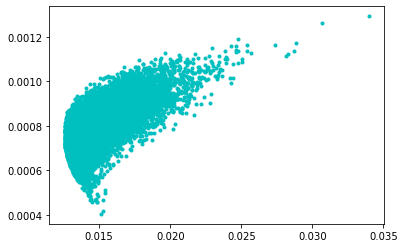

In [6]:
plt.plot(portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'c') 
plt.show()

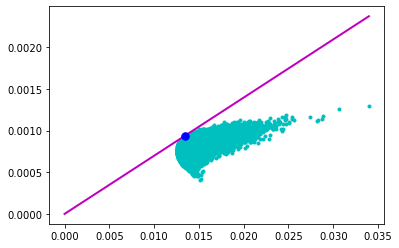

In [7]:
x = np.linspace(0, max(portfolio_standard_deviations), 10000)
y = portfolio_sharpe_ratios[index] * x
plt.plot( portfolio_standard_deviations,portfolio_means, 'o', markersize = 3, color = 'c')
plt.plot(x, y, '-', linewidth = 2, color = 'm')
plt.plot(portfolio_standard_deviations[index],portfolio_means[index],color="b",marker=".",markersize = 15)
plt.show()

In [8]:
print("The maximum value of Sharpe ratio achieved is : ",portfolio_sharpe_ratios[index])
print("with index value as: ",index)

The maximum value of Sharpe ratio achieved is :  0.06976168983536969
with index value as:  645


In [9]:
#Give a complete conceptual description of the meaning of the Sharpe ratio as it relates to the theory of portfolio optimization.Why do portfolio managers seek to maximize this measure?

Sharp ratio used o to understand the return compared to the risk of the envesment. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfoli.

In [10]:
print(df['Close_GS'].loc[some_weights.last_valid_index()])
print(df['Close_AMZN'].loc[some_weights.last_valid_index()])
print(df['Close_NFLX'].loc[some_weights.last_valid_index()])
print(df['Close_AAPL'].loc[some_weights.last_valid_index()])
print(df['Close_WFC'].loc[some_weights.last_valid_index()])

no_of_shares = allocations
no_of_shares['GS'].iloc[0] /= df['Open_GS'].loc[some_weights.last_valid_index()]
no_of_shares['AMZN'].iloc[0] /= df['Open_AMZN'].loc[some_weights.last_valid_index()]
no_of_shares['NFLX'].iloc[0] /= df['Open_NFLX'].loc[some_weights.last_valid_index()]
no_of_shares['AAPL'].iloc[0] /= df['Open_AAPL'].loc[some_weights.last_valid_index()]
no_of_shares['WFC'].iloc[0] /= df['Open_WFC'].loc[some_weights.last_valid_index()]

no_of_shares

193.8300018310547
310.3500061035156
48.801429748535156
27.594999313354492
54.81999969482422


,GS,AMZN,NFLX,AAPL,WFC
2014-12-31,0.076317,2.550529,26.442589,185.88265,47.76575


In [11]:
seven_years = df.loc['2014-12-31':] 
seven_years['Open'] = seven_years['Open_GS']*no_of_shares['GS'].iloc[0] + seven_years['Open_AMZN']*no_of_shares['AMZN'].iloc[0] + seven_years['Open_NFLX']*no_of_shares['NFLX'].iloc[0]+ seven_years['Open_AAPL']*no_of_shares['AAPL'].iloc[0]+ seven_years['Open_WFC']*no_of_shares['WFC'].iloc[0]
seven_years['Close'] = seven_years['Close_GS']*no_of_shares['GS'].iloc[0] + seven_years['Close_AMZN']*no_of_shares['AMZN'].iloc[0]+ seven_years['Close_NFLX']*no_of_shares['NFLX'].iloc[0]+ seven_years['Close_AAPL']*no_of_shares['AAPL'].iloc[0]+ seven_years['Close_WFC']*no_of_shares['WFC'].iloc[0]
seven_years = seven_years[['Open','Close']]
seven_years

,Open,Close
Date,,
2014-12-31,10000.000000,9844.735435
2015-01-02,9920.577697,9813.275511
2015-01-05,9718.641688,9514.800452
2015-01-06,9536.510533,9422.937410
2015-01-07,9520.589626,9521.563078
...,...,...
2021-10-25,56156.613188,56308.281841
2021-10-26,56571.771776,56494.415402
2021-10-27,56527.214673,56272.640917


Abslute Return of Our Portofolio:471.76%
CAGR of Our Portofolio: 169.98%
Information Ratio of Our Portofolio:1.14



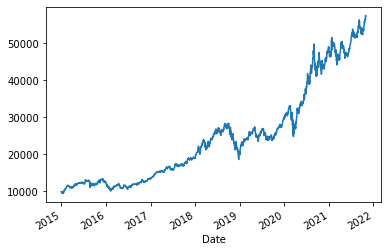

In [12]:
absolute_return = (seven_years['Close'].iloc[-1]-capital)/capital
CAGR = ((seven_years['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio = (seven_years.Close.pct_change().mean()/seven_years.Close.pct_change().std())*((252) **0.5)


s=f"""Abslute Return of Our Portofolio:{absolute_return*100:.2f}%
CAGR of Our Portofolio: {CAGR*100:.2f}%
Information Ratio of Our Portofolio:{information_ratio:.2f}
"""
print(s)
axs = seven_years.Close.plot()

In [13]:
short_time = 6
long_time = 12
seven_years['Close_Short_Rolling']= seven_years['Close'].rolling(window = short_time).mean()
seven_years['Close_Long_Rolling']= seven_years['Close'].rolling(window = long_time).mean()
seven_years['Window_diff']=seven_years['Close_Long_Rolling'] - seven_years['Close_Short_Rolling']
seven_years['Open_1_change'] = seven_years['Open']-seven_years['Open'].shift(1)
seven_years = seven_years.dropna()
seven_years

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change
Date,,,,,,
2015-01-16,9370.035434,9421.421380,9527.193022,9590.223813,63.030790,-182.254793
2015-01-20,9538.425053,9605.334659,9505.248385,9570.273748,65.025363,168.389620
2015-01-21,9864.684332,9897.181478,9567.297764,9577.265912,9.968148,326.259279
2015-01-22,9958.664915,10215.477506,9671.939407,9635.655666,-36.283740,93.980583
2015-01-23,10197.418195,10257.304403,9791.983044,9705.186249,-86.796795,238.753280
...,...,...,...,...,...,...
2021-10-25,56156.613188,56308.281841,55868.936928,54866.348374,-1002.588554,-74.436297
2021-10-26,56571.771776,56494.415402,56068.952012,55074.028531,-994.923482,415.158588
2021-10-27,56527.214673,56272.640917,56152.874736,55288.914453,-863.960283,-44.557102


In [14]:
X = seven_years.copy()
y = np.where(X.Close.shift(-1) >= X.Close, 1,-1)
index = int(0.3*len(X))
X_train = X.iloc[:index]
X_test = X.iloc[index:]
y_train = y[:index]
y_test = y[index:]
logistic = LogisticRegression()
logistic = logistic.fit(X_train,y_train)
pd.DataFrame(zip(X.columns, np.transpose(logistic.coef_)))

,0,1
0,Open,[-0.0002209634488908926]
1,Close,[-0.00011425708181863465]
2,Close_Short_Rolling,[0.0002849164360010202]
3,Close_Long_Rolling,[6.760628441336255e-05]
4,Window_diff,[-0.0002173101515876416]
5,Open_1_change,[0.0005222012160091056]


In [15]:
predictions = logistic.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))
print(logistic.score(X_test,y_test))

[[  8 521]
 [ 11 657]]
0.5555555555555556


In [16]:
results = X_test.copy()
results['C2C_Price']= X_test.Close.shift(-1) - X_test.Close
results['Predictions'] = predictions
results['True_Label']= y_test
results['Return']= results['C2C_Price']*results['Predictions']
results['Cum_Return']= results['Return'].cumsum()
results = results.dropna()
results

,Open,Close,Close_Short_Rolling,Close_Long_Rolling,Window_diff,Open_1_change,C2C_Price,Predictions,True_Label,Return,Cum_Return
Date,,,,,,,,,,,
2017-01-31,14139.122407,14168.407339,14184.064584,14016.838759,-167.225825,-52.524305,348.398246,1,1,348.398246,348.398246
2017-02-01,14470.053547,14516.805586,14268.826472,14075.576784,-193.249688,330.931140,-40.281179,1,-1,-40.281179,308.117067
2017-02-02,14470.937308,14476.524406,14313.366188,14136.746934,-176.619254,0.883762,50.853895,1,1,50.853895,358.970962
2017-02-03,14444.032754,14527.378301,14362.779002,14199.913216,-162.865786,-26.904554,34.273027,1,1,34.273027,393.243988
2017-02-06,14512.892601,14561.651328,14408.613069,14253.853313,-154.759755,68.859847,140.082187,1,1,140.082187,533.326175
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-22,56231.049485,56176.247733,55579.816425,54680.401600,-899.414824,815.282652,132.034108,1,1,132.034108,27577.347399
2021-10-25,56156.613188,56308.281841,55868.936928,54866.348374,-1002.588554,-74.436297,186.133561,1,1,186.133561,27763.480960
2021-10-26,56571.771776,56494.415402,56068.952012,55074.028531,-994.923482,415.158588,-221.774485,1,-1,-221.774485,27541.706475


Abslute Return of Our Algorithmic Trading:474.59%
Abslute Return of Our buy-and-hold Trading :306.38%
CAGR of Our Algorithmic Trading: 170.13%
CAGR of Our buy-and-hold Trading: 13.83%
Information Ratio of Our Algorithmic Trading:1.22
Information Ratio of Our buy-and-hold Trading:1.22



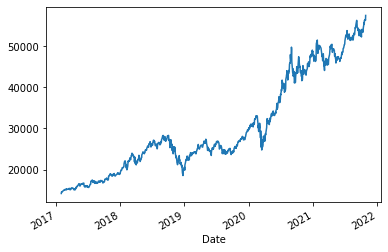

In [17]:
absolute_return_tf = (results['Close'].iloc[-1]-capital)/capital
CAGR_tf = ((results['Close'].iloc[-1]-capital)**(365/(df.index[-1] - df.index[0]).days))-1
information_ratio_tf = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)



absolute_return_bh = (results.Close.iloc[-1]-results.Open.iloc[0])/results.Open.iloc[0]
CAGR_bh = ((results.Close.iloc[-1]/results.Open.iloc[0])**(252/len(df)))-1
information_ratio_bh = (results.Close.pct_change().mean()/results.Close.pct_change().std())*((252) **0.5)




s=f"""Abslute Return of Our Algorithmic Trading:{absolute_return_tf*100:.2f}%
Abslute Return of Our buy-and-hold Trading :{absolute_return_bh*100:.2f}%
CAGR of Our Algorithmic Trading: {CAGR_tf*100:.2f}%
CAGR of Our buy-and-hold Trading: {CAGR_bh*100:.2f}%
Information Ratio of Our Algorithmic Trading:{information_ratio_tf:.2f}
Information Ratio of Our buy-and-hold Trading:{information_ratio_bh:.2f}
"""

print(s)
results.Close.iplot()
#or
axs=results.Close.plot()

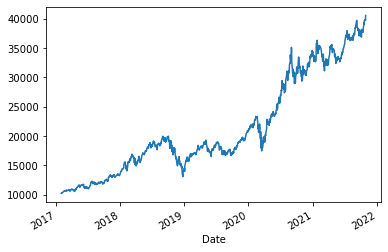

In [18]:
((results.Close.pct_change().dropna()+1).cumprod()*capital).iplot()
#or
axs=((results.Close.pct_change().dropna()+1).cumprod()*capital).plot()